In [41]:
import numpy as np
from pathlib import Path
import h5py
from tqdm import tqdm
from itertools import product
import multiprocessing as mp

In [48]:
import matplotlib.pyplot as plt

In [28]:
from robust_motifs.data import (save_count_graph_from_matrix, matrix_shuffle,
                                import_connectivity_matrix, adjust_bidirectional_edges,
                               load_sparse_matrix_from_pkl)
from robust_motifs.custom_mp import prepare_shared_memory
from robust_motifs.counting import get_n_extended_simplices

In [4]:
original_matrix = import_connectivity_matrix(dataframe = False, type = 'csr')

pathway_shuffled_matrix = import_connectivity_matrix(dataframe= False, type='csr', pathway_shuffle=True)

shuffled_matrix = matrix_shuffle(original_matrix)

In [7]:
original_matrix.multiply(original_matrix.T)

pathway_shuffled_matrix.multiply(pathway_shuffled_matrix.T)

shuffled_matrix.multiply(shuffled_matrix.T)

<31346x31346 sparse matrix of type '<class 'numpy.bool_'>'
	with 182932 stored elements in Compressed Sparse Row format>

In [12]:
bid_adjusted_matrix = adjust_bidirectional_edges(shuffled_matrix, int(182932/2))

Adding bidirectional edges...: 100%|██████████| 61344/61344 [00:00<00:00, 158222.67it/s]


In [17]:
bid_adjusted_matrix.multiply(bid_adjusted_matrix.T)

<31346x31346 sparse matrix of type '<class 'numpy.bool_'>'
	with 182933 stored elements in Compressed Sparse Row format>

### Processing

### Column

In [22]:
save_path = Path("data/models/column/column.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, original_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 2483183.87it/s]
7648079it [00:11, 655513.32it/s]


In [42]:
pool = mp.Pool()

In [46]:
overall_results = {}
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[dimension] = overall_results.get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82442, 2: 98902, 3: 110942, 4: 121311, 5: 129081, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82811, 2: 99365, 3: 112128, 4: 122271, 5: 129834, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82321, 2: 100094, 3: 112793, 4: 121394, 5: 131850, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82854, 2: 99702, 3: 111514, 4: 122500, 5: 131144, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82269, 2: 99348, 3: 111928, 4: 123140, 5: 131076, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 83258, 2: 99416, 3: 112993, 4: 121420, 5: 131337, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82801, 2: 100284, 3: 112232, 4: 122014, 5: 129608, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 83235, 2: 100396, 3: 111902, 4: 122930, 5: 131028, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 82829, 2: 99392, 3: 113233, 4: 122858, 5: 131141, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


100%|██████████| 6/6 [01:32<00:00, 15.47s/it]

Extended simplices for 10000 simplices per dimension
{1: 82901, 2: 101369, 3: 113011, 4: 121599, 5: 133174, 6: 7208}
Total simplices per dimension
{1: 7648079, 2: 73036616, 3: 59945205, 4: 6599529, 5: 133115, 6: 529}


<BarContainer object of 6 artists>

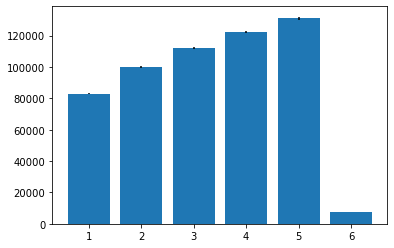

In [49]:
a = []
b = []
for elem in overall_results.values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

### Pathway shuffled

In [50]:
save_path = Path("data/models/pshuffled/pshuffled.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, pathway_shuffled_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 2827411.90it/s]
7648079it [00:11, 649818.33it/s]


In [51]:
pool = mp.Pool()

In [52]:
overall_results = {}
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[dimension] = overall_results.get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 32213, 2: 36869, 3: 40617, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 32155, 2: 36904, 3: 40057, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 31950, 2: 36668, 3: 40287, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 32347, 2: 36719, 3: 40148, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 31574, 2: 36722, 3: 39982, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 32457, 2: 36969, 3: 40493, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 32276, 2: 37224, 3: 39906, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 31929, 2: 36453, 3: 40414, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 32155, 2: 36799, 3: 40170, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


100%|██████████| 6/6 [00:54<00:00,  9.05s/it]

Extended simplices for 10000 simplices per dimension
{1: 32368, 2: 36649, 3: 40266, 4: 7503, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 24790802, 3: 1418249, 4: 1757, 5: 0, 6: 0}


<BarContainer object of 6 artists>

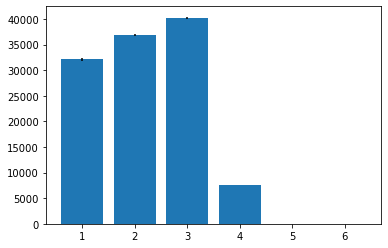

In [53]:
a = []
b = []
for elem in overall_results.values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

### ER

In [54]:
save_path = Path("data/models/shuffled/shuffled.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, shuffled_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 3194388.77it/s]
7586735it [00:11, 658890.88it/s]


In [55]:
pool = mp.Pool()

In [56]:
overall_results = {}
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[dimension] = overall_results.get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19295, 2: 18998, 3: 19193, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19343, 2: 19146, 3: 19290, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19273, 2: 19192, 3: 19165, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19259, 2: 19155, 3: 19257, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19130, 2: 19197, 3: 19155, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19180, 2: 19276, 3: 19162, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19382, 2: 18834, 3: 19117, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19057, 2: 19063, 3: 19166, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 19047, 2: 19310, 3: 19243, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


100%|██████████| 6/6 [00:52<00:00,  8.73s/it]

Extended simplices for 10000 simplices per dimension
{1: 19306, 2: 19076, 3: 18994, 4: 2873, 5: 0, 6: 0}
Total simplices per dimension
{1: 7586735, 2: 14232932, 3: 309172, 4: 1512, 5: 0, 6: 0}


<BarContainer object of 6 artists>

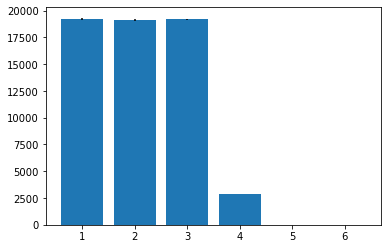

In [57]:
a = []
b = []
for elem in overall_results.values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)

### ER bid adjusted

In [58]:
save_path = Path("data/models/adjusted/adjusted.flag")
save_path.parent.mkdir(exist_ok=True, parents=True)
flag_path, pkl_path, count_path =save_count_graph_from_matrix(save_path, bid_adjusted_matrix)

100%|██████████| 31346/31346 [00:00<00:00, 2330738.95it/s]
7648079it [00:11, 669075.57it/s]


In [59]:
pool = mp.Pool()

In [60]:
overall_results = {}
complex_file = h5py.File(count_path, 'r')
matrix = load_sparse_matrix_from_pkl(pkl_path)
bid_matrix = matrix.multiply(matrix.T)
arrays, links = prepare_shared_memory(matrix, "full")
bid_arrays, bid_links = prepare_shared_memory(bid_matrix, "bid")
for _ in range(10):
    result_dictionary = {}
    aux_dictionary = {}
######## iteration #####
    for dimension in tqdm(range(1, 7)):
        try:
            ####### step 1: compiling the dictionary ######
            random_selection = np.random.choice(complex_file["Cells_" + str(dimension)].shape[0],
                                                min(10000,complex_file["Cells_" + str(dimension)].shape[0]),
                                                replace = False)
            random_selection.sort()
            simplex_iterator = iter(complex_file["Cells_" + str(dimension)][random_selection])
            ###### step 2: getting bidirectional targets ######
             # fictitious product to satisfy imap reqs of a single arugment.
            mp_iterator = product(simplex_iterator, [arrays], [bid_arrays])
            results = pool.imap(get_n_extended_simplices, mp_iterator)
            ###### step 3: counting extended simplices ######
            for elem in results:
                result_dictionary[dimension] = result_dictionary.get(dimension, 0) + elem[0]
        except KeyError: # If there are no simplices in h5 file..
                result_dictionary[dimension] = 0
        try:
            aux_dictionary[dimension] = len(complex_file["Cells_" + str(dimension)])
        except KeyError: # If there are no simplices in h5 file...
            aux_dictionary[dimension] = 0
        
        overall_results[dimension] = overall_results.get(dimension, []) + [result_dictionary[dimension]]
    print("Extended simplices for 10000 simplices per dimension")
    print(result_dictionary)
    print("Total simplices per dimension")
    print(aux_dictionary)
    # free shared memory
for link in links:
    link.unlink()
for link in bid_links:
    link.unlink()

  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 57969, 2: 58046, 3: 58637, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58174, 2: 58637, 3: 58743, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58305, 2: 57961, 3: 58330, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58515, 2: 58227, 3: 58585, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 57991, 2: 58482, 3: 58484, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58347, 2: 58035, 3: 58435, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58713, 2: 58153, 3: 58145, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58323, 2: 58208, 3: 58690, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


  0%|          | 0/6 [00:00<?, ?it/s]

Extended simplices for 10000 simplices per dimension
{1: 58356, 2: 58391, 3: 58240, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


100%|██████████| 6/6 [00:55<00:00,  9.22s/it]

Extended simplices for 10000 simplices per dimension
{1: 58216, 2: 57758, 3: 58088, 4: 9559, 5: 0, 6: 0}
Total simplices per dimension
{1: 7648079, 2: 14580512, 3: 323530, 4: 1612, 5: 0, 6: 0}


<BarContainer object of 6 artists>

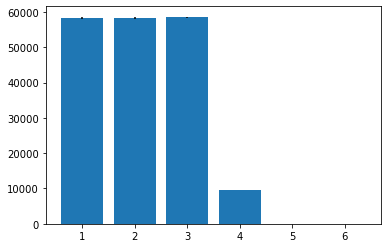

In [61]:
a = []
b = []
for elem in overall_results.values():
    a.append(np.mean(elem))
    b.append(np.std(elem))
plt.bar(range(1,7), a, yerr=b)